# Midterm - DS3000 (100 pts + 15 Bonus)

### Student Name: xxxxxxxx
### Student ID: xxxxxxxx

## General comments

* This Midterm integrates knowledge and skills acquired in the first half of the semester, especially in the Assignments. 

* You **are allowed** to use any document and sources on your computer and look up documents on the internet. You need to **cite any code that you use if it is NOT from the course** Labs or Tutorial examples. 

* You are **NOT allowed to use chatbots**. 

* You are **NOT allowedto share documents, or communicate**  in any other way with people inside or outside the class during the Midterm.

* To finish the Midterm in the alloted **2 hrs**, you will have to work efficiently. **Read the entirety of each question carefully.** 

* You need to submit the Midterm **at 10:30 am on OWL in the Assignments/Midterm** section where you downloaded the data set and notebook. Late submission will be scored with 0 pts, unless you have received extra accommodation. To avoid technical difficulties, start your submission at latest five to ten minutes before the deadline. To be sure, you can also submit multiple version - only the latest version will be graded.  

* Some question demand a **Written Answer** - answer these in a full English sentence. 

* For your Figures, ensure that all axes are **labeled** in an informative way. 

* Ensure that your **code runs correctly** by choosing "Kernel -> Restart and Run All" before submitting. 

### Additional Guidance

If at any point you are not sure about the answer, then *write your assumptions clearly in your exam and proceed according to those assumptions.*

Good luck!

In [309]:
## Preliminaries

### YOU MAY ADD ADDITIONAL IMPORTS IF YOU WISH

import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, mean_absolute_error, mean_squared_error, r2_score, accuracy_score
# from datetime import datetime
 

## Dataset 

This exam objective is to develop a data-driven predictive model for the price of properties.  
You will be working with a dataset called `Property_Price`. You need to download this dataset from OWL in the Assignments/Midterm. Below, we provide a detailed description of each variable in the dataset:

-	**ID**: the property's identification
-	**MSSubClass**: The building class
-	**LotArea**: Lot size in square feet
-	**LandSlope**: Slope of property
-	**HouseStyle**: Style of dwelling
-	**OverallQual**: Overall material and finish quality
-	**OverallCond**: Overall condition rating
-	**YearBuilt**: Original construction date
-	**MasVnrArea**: Masonry veneer area in square feet
-	**TotalBsmtSF**: Total square feet of basement area
-	**Heating**: Type of heating
-	**CentralAir**: Central air conditioning
-	**1stFlrSF**: First Floor square feet
-	**2ndFlrSF**: Second floor square feet
-	**GrLivArea**: Above grade (ground) living area square feet
-	**FullBath**: Full bathrooms above grade
-	**HalfBath**: Half baths above grade
-	**BedroomAbvGr**: Number of bedrooms above basement level
-	**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
-	**Fireplaces**: Number of fireplaces
-	**GarageCars**: Size of garage in car capacity
-	**GarageArea**: Size of garage in square feet
-	**PavedDrive**: Paved driveway
-	**WoodDeckSF**: Wood deck area in square feet
-	**OpenPorchSF**: Open porch area in square feet
-	**MiscVal**: $Value of miscellaneous feature
-	**YrSold**: Year Sold
-	**SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict.







## Question1: Regression (60 pts)

### Q1.1: Data Preparation (15pts)

Load the dataset and perform necessary preprocessing steps and feature engineering:

- Remove rows with any null values. 

- Remove the `Id` column from your dataframe. 

- Find the age of property using `YearBuilt` variable and replace `YearBuilt` with the new variable `PropertyAge`.

- Use `YrSold` variable to calculate how many years ago the property was sold and name that new coulmn `YrsSinceSale` and replace `YrSold`.

- Encode all categorical columns (One-hot encoding). 

- **Written Answer**: How many new columns were added?

- **Written Answer**: Explain the choice of One-hot encoding for categorical variables and the potential issues with dimensionality.


In [310]:
df = pd.read_csv('Property_Price.csv')
df = df.drop(columns=['Id'])
df = df.dropna()

yrb = df['YearBuilt'].values
property_age = 2023 - yrb
df['PropertyAge'] = property_age
df = df.drop(columns=['YearBuilt'])

yrs = df['YrSold'].values
sale_age = 2023 - yrs
df['YrsSinceSale'] = sale_age
df = df.drop(columns=['YrSold'])

# Assume not drop first
df = pd.get_dummies(df, columns=['LandSlope'], prefix='LandSlope', drop_first=False)
df = pd.get_dummies(df, columns=['HouseStyle'], prefix='HouseStyle', drop_first=False)
df = pd.get_dummies(df, columns=['Heating'], prefix='Heating', drop_first=False)
df = pd.get_dummies(df, columns=['CentralAir'], prefix='CentralAir', drop_first=False)
df = pd.get_dummies(df, columns=['PavedDrive'], prefix='PavedDrive', drop_first=False)

df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60,8450,7,5,196.0,856,856,854,1710,2,...,True,False,False,False,False,False,True,False,False,True
1,20,9600,6,8,0.0,1262,1262,0,1262,2,...,True,False,False,False,False,False,True,False,False,True
2,60,11250,7,5,162.0,920,920,866,1786,2,...,True,False,False,False,False,False,True,False,False,True
3,70,9550,7,5,0.0,756,961,756,1717,1,...,True,False,False,False,False,False,True,False,False,True
4,60,14260,8,5,350.0,1145,1145,1053,2198,2,...,True,False,False,False,False,False,True,False,False,True


**Written Answer**: Added 24 columns 

**Written Answer**: Hot encoded the columns that were not represented by only numbers.

### Q1.2: Data Splitting (5pts)

- Separate `SalePrice` as the target variable for your machine learning model (Regression). 
- Split your preprocessed dataset by setting aside 20 percent of data for testing, and the rest for training. *Make sure to set the random_state to 42 if you are using a sklearn function to accomplish this. 


In [311]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

### Q1.3: Build a Linear Regression model (15pts)
- Build a model to predict SalePrice as a `linear function` of the other variables (features) in the dataset. In order to properly build the regression model, the features need to be `standardized`. Build a `pipeline` that **standardizes the features** and **creates a linear regression model**.
- Report the Mean Squared Error (MSE) to evaluate both the training and test performance of your model.
- **Written Answer**:Explain the potential reasons for the observed MSE and discuss strategies for improvement.

In [312]:
linear_regression = Pipeline([
    ('scale', StandardScaler()),
    ('linear_regression', LinearRegression())
])
linear_regression.fit(Xtrain, ytrain)

y_pred = linear_regression.predict(Xtest)
mse = mean_squared_error(ytest, y_pred)

print(f'MSE: {mse}')

MSE: 2.708425808113497e+34


**Written Answer**: There might be too many features, might need to cut down and find the ones that are relevant

### Q1.4: Regularization and Hyperparameter Tuning (25pts)

1. Use L2 regularization by adding a penalty of $\alpha$ to the regression model: $\alpha \sum_{i}{\theta_i^2}$  (where $\theta_i$ are your regression coefficients). Vary the regularization parameter $\alpha$  between 0.2 and 250, evenly spaced in log-space, and generate 50 values. 
2. Build the `pipeline` that **standardizes the features** and **create the regularized regression model**.
3. Define a grid of regularization parameters for hyperparameter tuning for different values of $\alpha$ (using gridsearch and cv=10). Use MSE as evaluation criterion (*hint: use 'neg_mean_squared_error' as scoring*).  
4. Make a plot of the mean validation scores vs $\alpha$.  
5. Report the best (optimum) $\alpha$ that you found.
6. Evaluate the the model performance on the test set using the best $\alpha$ and report test MSE.
7. **Written Answer"**:What was the impact of regularization on the model's performance? How does the regularization parameter alpha influence the model?



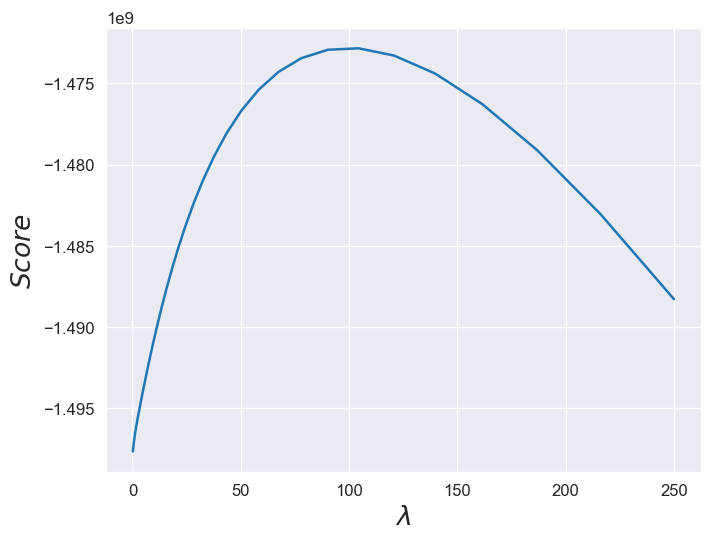

Best lambda: 104.40625970589839


In [313]:
regularization_params = np.exp(np.linspace(np.log(0.2), np.log(250), 50))
cv_score_mean = np.zeros(regularization_params.size)

for i, L in enumerate(regularization_params):
    ridge_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('regression', Ridge(alpha=L, fit_intercept=True)) 
    ])
    
    cv_r2_score = cross_val_score(ridge_pipe, Xtrain, ytrain, cv=10, scoring='neg_mean_squared_error')
    cv_score_mean[i]= cv_r2_score.mean()
    
fig, ax = plt.subplots(dpi = 120)
ax.plot(regularization_params, cv_score_mean)
ax.set_xlabel(r'$\lambda$', fontsize = 16)
ax.set_ylabel(r'$Score$', fontsize = 16)
plt.show()

best_lamda = np.argmax(cv_score_mean)
print(f'Best lambda: {regularization_params[best_lamda]}')


**Written Answer:** regularizing helps with overwriting, alpha influences the degree of regularization applied

## Question 2  - Classification (40 pts)

### Q2.1: Logistic Regression (LR) (20pts)
1. Convert the problem into a binary classification by changing the taget variable. Use the train and test sets from Q1.2. If `SalePrice` is above median value (inclusive) will be assigned 1, and 0 otherwise. 
2. Perform logistic regression`. Evaluate the model generalization using `confusion matrix` and `accuracy` metrics and report them.
3. Plot ROC curve and report AUC. 
4. **Written Answer** Discuss the choice of converting the regression problem into a binary classification task and its practical implications.
5. **Written Answer** Analyze the confusion matrix results and discuss the balance between false positives and false negatives.

In [314]:
X2 = df.drop(columns=['SalePrice'])
y2 = df['SalePrice'].values

median_y = np.median(y2)
for i in range(len(y2)):
    if y2[i] < median_y:
        y2[i] = 0
    else:
        y2[i] = 1


logistic_regression = Pipeline([
    ('scale', StandardScaler()),
    ('linear_regression', LogisticRegression(max_iter=10000))
])
logistic_regression.fit(X2,y2)

y2_pred_test = logistic_regression.predict(X2)
cm = confusion_matrix(y2, y2_pred_test)
ascore = accuracy_score(y2, y2_pred_test)
auc_scores = cross_val_score(logistic_regression, X2, y2, cv=10, scoring='roc_auc')

print(f'Confusion Matrix: {cm}')
print(f'Accuracy Score: {ascore}')
print(f'AUC scores: {auc_scores}')

fpr, tpr, thresholds = roc_curve(y2, y2_pred_test)

Confusion Matrix: [[675  51]
 [ 56 670]]
Accuracy Score: 0.9263085399449036
AUC scores: [0.97410396 0.98705198 0.97983257 0.97431507 0.96708524 0.95909437
 0.9695586  0.97907154 0.96537291 0.96917808]


**Written Answer:** 

**Written Answer:** 

### Q2.2: Support Vector Machine (SVM) (20pts)

1. Define an SVM classification model and choose a range of ten (10) values for regularization parameter `C` between 0.01 and 10, evenly spaced in log-space.
2. Calculate the mean and standard deviation for the training scores and validation score using 10 fold validation_curve with `accuracy` metric. 
3. Find the best C and report its value. 
4. Calculate and report test accuracy using best C value.
5. Plot ROC curve and report AUC. 
6. **Written Answer**: to compare SVM results with Logistic Regression's in Q2.1, what do you conclude according to their test AUC and Accuracy values. Comprehensively explain.


In [315]:
from sklearn.svm import LinearSVC

# Using same data from Q2.1
SVM = Pipeline([
    ('scale', StandardScaler()),
    ('linear_regression', LinearSVC(max_iter=10000))
])
SVM.fit(X2,y2)
y2_pred_test = SVM.predict(X2)
cm = confusion_matrix(y2, y2_pred_test)
ascore = accuracy_score(y2, y2_pred_test)
auc_scores = cross_val_score(SVM, X2, y2, cv=10, scoring='roc_auc')

print(f'Confusion Matrix: {cm}')
print(f'Accuracy Score: {ascore}')
print(f'AUC scores: {auc_scores}')

fpr, tpr, thresholds = roc_curve(y2, y2_pred_test)

/Users/michaelruiz/anaconda3/envs/DS_A4/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelruiz/anaconda3/envs/DS_A4/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/michaelruiz/anaconda3/envs/DS_A4/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelruiz/anaconda3/envs/DS_A4/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/michaelruiz/

Confusion Matrix: [[668  58]
 [ 62 664]]
Accuracy Score: 0.9173553719008265
AUC scores: [0.96978795 0.98404954 0.97792998 0.97127093 0.95890411 0.9446347
 0.9640411  0.97393455 0.96366058 0.96232877]


**Written Answer**: 

## Question 3 - Model Uncertainty (15 Bonus pts)

- Estimate the confidence interval of the performance of either Logistic Regression or SVM models, you created above in Q3, using the bootstrap method with 10 bootstrap samples.
- **Written Answer:** Discuss the significance of the 95% confidence interval in the context of model performance.How can the concept of uncertainty in model predictions impact decision-making processes?

In [316]:
def BootstrapCoef(data, numboot, model):
    n = len(data)
    theta = np.empty((0,2))
    
    for i in range(numboot):
        d = data.sample(n,replace=True)
        x_b = d.drop(columns=['SalePrice'])
        X_b = np.c_[np.ones(d.shape[0]), x_b]
        y_b = d['SalePrice'].values
        m = model
        m.fit(X_b, y_b)
 
        boot_intercepts = m.intercept_
        boot_coef = m.coef_[1]
        theta = np.append(theta, np.array([[boot_intercepts, boot_coef]]), axis=0)
        
    return theta

theta1 = BootstrapCoef(df, 10, LogisticRegression(max_iter=10000))
theta2 = BootstrapCoef(df, 10, LinearSVC(max_iter=10000))

bs_res = theta1[:, 1] - logistic_regression.coef_
ci_lower, ci_upper = np.quantile(bs_res, [0.025, 0.975])
boot_ci = [logistic_regression.coef_ - ci_upper, logistic_regression.coef_ - ci_lower]
print(f'My confidence interval is between {boot_ci[0]} and {boot_ci[1]}')

IndexError: index 1 is out of bounds for axis 0 with size 1

**Written Answer:**
